### This notebook presents how to obtain number embeddings with NEKG.

<ul>
    <li> In <b>Section 3.1</b>, we construct the knowledge, generating 200 triples (e.g., ['0','isLessThan', '50'], ['100','isLessThan', '150'], etc.).</li><br>
    <li>In <b>Section 3.2</b>, we embed the graph in a 100-D vector space using a standard graph embedding method TransE. We visualize the embedding vectors using t-SNE in a 2-D space.</li><br>
    <li>In <b>Section 3.3</b>, we embed the integers from 500 to 1000 (i.e., [500, 1000)) using the interpolation method and visualize the embedding vectors using t-SNE in a 2-D space.</li>
</ul>




In [12]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import ampligraph
from ampligraph.latent_features import TransE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

<b>VERSION:</b>
<ul>
    <li>python 3.7.3</li>
    <li>tensorflow 1.15.0</li>
    <li>numpy 1.19.5</li>
    <li>ampligraph 1.3.2</li>
    <li>pandas 0.24.1</li>
    <li>sklearn 0.21.2</li>
    <li>matplotlib 3.4.2</li>
</ul>

### 3.1 Knowledge Graph Construction

In [13]:
# Knowledge Graph Construction.
def graph_construction(start, stop, step):
    kg = pd.DataFrame()
    kg['h'] = [i for i in np.arange(start, stop, step)]
    kg['r'] = ['isLessThan'] * int((stop-start) / step)
    kg['t'] = [i for i in np.arange(step, stop+1, step)]
    kg["h"] = kg.h.values.astype(str)
    kg["t"] = kg.t.values.astype(str)
    return kg

In [14]:
start = 0
stop = 10000
step = 50
kg_df = graph_construction(start, stop, step)
kg_df.head()

,h,r,t
0,0,isLessThan,50
1,50,isLessThan,100
2,100,isLessThan,150
3,150,isLessThan,200
4,200,isLessThan,250


### 3.2 Knowledge Graph Embedding

In [15]:
kg_array = kg_df.to_numpy().astype(str)
model = TransE(epochs=200, k=100, verbose=True)
model.fit(kg_array)

2022-10-28 21:04:12.019199: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:969] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-28 21:04:12.019285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce GTX 1660 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:01:00.0
2022-10-28 21:04:12.019502: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022-10-28 21:04:12.019603: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022

In [16]:
# Obtain the embedding vector of 100.
embedding = model.get_embeddings(entities='100', embedding_type='entity')
embedding

array([-0.03690041, -0.03287071,  0.05134401, -0.01771941,  0.04342166,
       -0.05211408, -0.08942881, -0.0186477 , -0.05014663,  0.01615518,
       -0.03333031, -0.04597895,  0.01716471, -0.05109926,  0.05432875,
        0.06445452, -0.00803256, -0.05557336, -0.02790391, -0.05393754,
       -0.00147981,  0.04416272, -0.02012426, -0.03722629, -0.0642583 ,
       -0.03273066,  0.09693471,  0.03440669,  0.04950272, -0.05960407,
       -0.02108212, -0.05511141,  0.03969104,  0.00396161,  0.02126307,
       -0.06347461,  0.01426665, -0.00194556, -0.05621431, -0.0432833 ,
        0.03294984,  0.04644944,  0.01930415, -0.00339828, -0.00360486,
        0.01037453,  0.02973313, -0.06000857,  0.05025435, -0.04011907,
       -0.03234567,  0.01951869, -0.02515221,  0.03880295,  0.00082654,
       -0.07140546,  0.03531972, -0.03721511, -0.02972727,  0.0362316 ,
       -0.03237683, -0.09696919,  0.02934492, -0.02307719, -0.00078179,
       -0.02885424, -0.03489061, -0.04629858,  0.02990286,  0.08

In [17]:
# Dimensionality reduction using t-SNE.
embeddings = model.get_embeddings(entities=[str(j) for j in np.arange(start, stop+1, step)], embedding_type='entity')
embeddings = np.asarray(embeddings, dtype='float64')
embeddings_tSNE = TSNE(n_components=2).fit_transform(embeddings)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
embeddings_tSNE['magnitude'] = [i for i in range(start, stop+1, step)]
embeddings_tSNE.head()

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,11.834501,8.793296,0
1,11.884017,8.736079,50
2,11.760803,8.604768,100
3,12.124061,8.578742,150
4,11.690334,8.346766,200


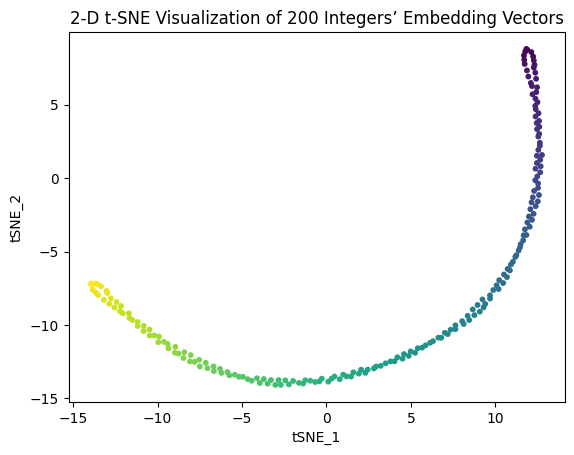

In [18]:
# Visualize the embedding vectors in 2-D space.
plt.scatter(embeddings_tSNE.tSNE_1, embeddings_tSNE.tSNE_2, c=embeddings_tSNE.magnitude, s=10)
plt.title('2-D t-SNE Visualization of 200 Integers’ Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()

### 3.3 Interpolation Method

In [8]:
# Measure the similarity between numbers.
def cal_sim(x1, x2, x3):
    return (x2-x1)/(x3-x1)

In [9]:
# Obtain embedding vectors for OOVs.
OOVs = range(500, 1000)
OOV_embeddings = []
for i in OOVs:
    for j in np.arange(start, stop+1, step):
        if i < j:
            upper = j
            lower = j-step
            e1 = model.get_embeddings(str(lower), embedding_type='entity')
            e2 = model.get_embeddings(str(upper), embedding_type='entity')
            s2 = cal_sim(lower, i, upper)
            s1 = 1-s2            
            OOV_embeddings.append(e1 * s1 + e2 * s2)
            break

In [10]:
# Dimensionality reduction using t-SNE.
OOV_embeddings = np.asarray(OOV_embeddings, dtype='float64')
OOV_embeddings_tSNE = TSNE(n_components=2).fit_transform(OOV_embeddings)
OOV_embeddings_tSNE = pd.DataFrame(OOV_embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
OOV_embeddings_tSNE['magnitude'] = OOVs
OOV_embeddings_tSNE.head()

,tSNE_1,tSNE_2,magnitude
0,-30.995590,2.480355,500
1,-30.851843,2.485485,501
2,-31.154890,2.784283,502
3,-31.151619,2.900439,503
4,-30.544378,2.652500,504


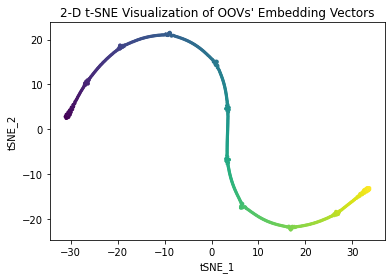

In [11]:
# Visualize the embedding vectors of OOVs in 2-D space.
plt.scatter(OOV_embeddings_tSNE.tSNE_1, OOV_embeddings_tSNE.tSNE_2, c=OOV_embeddings_tSNE.magnitude, s=5)
plt.title('2-D t-SNE Visualization of OOVs\' Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()